<b>

<p>
<center>
<font size="5">
Final Project Machine Learning
</font>
</center>
</p>

<p>
<center>
<font size="4">
People Analytics : Employee trunover analytics
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Author: Junchi Tian, Jingshu Song
</font>
</center>
</p>

</b>

# Introduction
- People Analytics (PA) is a data-driven HR function recently emerged in world’s top high-tech companies. Starting from specific talent management questions, PA collects, integrates and analyzes data, and applies the result to human resource decision-making and practices.
<br>
- As we all know, data science is powerful when it applies to different domains, such as Fintech, health analytics, NLP and so on. People analytics is a quite new domain and growing rapidly. It motivates me to learn more, find this dataset and try to figure out why employee want to leave a company.
<br>
- Data is from kaggle(https://www.kaggle.com/lnvardanyan/hr-analytics). We want to figure out why employee want to leave a company, then company can retain more talents and make better human resource management strategies. So for this dataset, the target feature is left(1 is leave and 0 is stay). Obviously, this is a classification problem.

In [23]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
os.chdir('C:\\Users\\junch\\Desktop\\ML 1')

# Load data

In [24]:
data=pd.read_csv('turnover.csv')

In [25]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.72,0.99,3.0,143.0,4.0,0.0,0.0,0.0,sales,low
1,0.62,0.87,6.0,169.0,2.0,1.0,0.0,0.0,sales,medium
2,0.84,0.99,4.0,262.0,6.0,0.0,1.0,0.0,accounting,medium
3,0.21,0.76,6.0,219.0,4.0,1.0,0.0,0.0,sales,medium
4,0.52,0.38,2.0,103.0,3.0,0.0,0.0,0.0,support,medium


In [26]:
data.shape

(14999, 10)

# Data Processing

In [27]:
#Check missing values
data.isna().sum()

satisfaction_level       1400
last_evaluation            11
number_project              1
average_montly_hours        3
time_spend_company          1
Work_accident               3
left                        1
promotion_last_5years       1
sales                       1
salary                      1
dtype: int64

In [28]:
# Impurt missing values of satisfaction_level using the mean.
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.NaN, strategy='mean')
data['satisfaction_level'] = si.fit_transform(data[['satisfaction_level']])
data.isna().sum()

satisfaction_level        0
last_evaluation          11
number_project            1
average_montly_hours      3
time_spend_company        1
Work_accident             3
left                      1
promotion_last_5years     1
sales                     1
salary                    1
dtype: int64

In [29]:
#For other categories, we directly remove rows with missing values
data.dropna(axis=0,how='any',inplace=True) 
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [30]:
data.shape

(14977, 10)

# Exploratory Data Analysis

In [31]:
#About 76% employees choose to stay and others choose to leave   
left_ratio = data['left'].value_counts() / len(data)
left_ratio

0.0    0.761835
1.0    0.238165
Name: left, dtype: float64

In [32]:
#move 'left' to the front
lef = data['left']
data.drop(labels=['left'], axis=1,inplace = True)
data.insert(0, 'left', lef)
data.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.0,0.72,0.99,3.0,143.0,4.0,0.0,0.0,sales,low
1,0.0,0.62,0.87,6.0,169.0,2.0,1.0,0.0,sales,medium
2,1.0,0.84,0.99,4.0,262.0,6.0,0.0,0.0,accounting,medium
3,0.0,0.21,0.76,6.0,219.0,4.0,1.0,0.0,sales,medium
4,0.0,0.52,0.38,2.0,103.0,3.0,0.0,0.0,support,medium


In [33]:
#Label Encoding: Sales and Salary
data["sales"] = data["sales"].astype('category').cat.codes
data["salary"] = data["salary"].astype('category').cat.codes
data.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.0,0.72,0.99,3.0,143.0,4.0,0.0,0.0,7,1
1,0.0,0.62,0.87,6.0,169.0,2.0,1.0,0.0,7,2
2,1.0,0.84,0.99,4.0,262.0,6.0,0.0,0.0,2,2
3,0.0,0.21,0.76,6.0,219.0,4.0,1.0,0.0,7,2
4,0.0,0.52,0.38,2.0,103.0,3.0,0.0,0.0,8,2


# Data Visualization

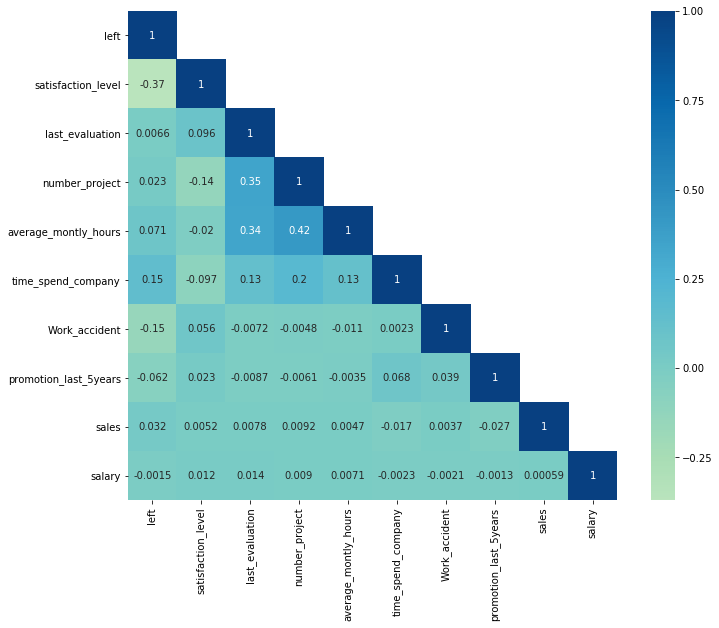

In [34]:
#The most correlated feature with dependent variable is satisfaction_level
plt.figure(figsize=(12,9))

corr_matrix=data.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr_matrix, vmax=1, mask=mask,square=True,annot=True,cmap="GnBu",center=0)

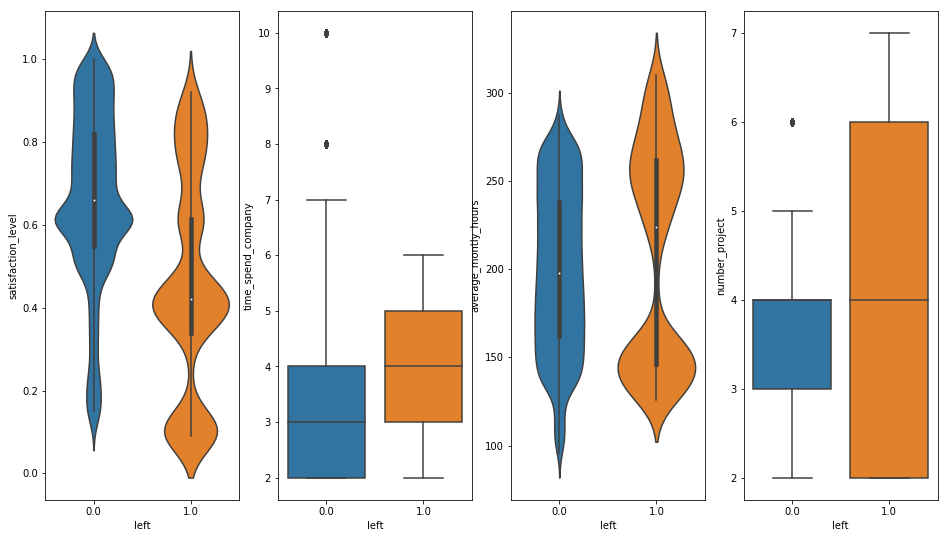

In [35]:
# Boxplot and violinplot
# We can find that employees left have lower satisfaction level, mainly on 0.1 and 0.4. Employees with higher satisfaction level than 0.6 won't leave.
# Employees whose working time is from 3 to 5 years tend to leave and mainly on 150 hours and 250 hours. Employees who stay show a uniform distribustion on working time.

plt.figure(figsize=(16,9))
plt.subplot(1, 4, 1)
sns.violinplot(x="left", y="satisfaction_level",  data=data)

plt.subplot(1, 4, 2)
sns.boxplot(x="left", y="time_spend_company",  data=data)

plt.subplot(1, 4, 3)
sns.violinplot(x="left", y="average_montly_hours",  data=data)

plt.subplot(1, 4, 4)
sns.boxplot(x="left", y="number_project",  data=data)

In [36]:
#Get features and the target
X=data.drop(columns=['left'])
y=data['left']

In [37]:
# Over Sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X, y = ros.fit_sample(X, y)

pd.DataFrame(data=y, columns=['left'])['left'].value_counts()
X=pd.DataFrame(X)
X.columns=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary']

# Hyperparameter tuning and model selection


In [38]:
# Divide the data to training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0, stratify=y)

In [39]:
# Create the dictionary of classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clfs = {'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'svc': SVC(random_state=0),
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB()}

In [42]:
# Create the dictionary of pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])

In [43]:
param_grids = {}

In [44]:
#The parameter grid for logistic regression
C_range = [10 ** i for i in range(-2, 3)]

param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]


param_grids['lr'] = param_grid

In [45]:
#The parameter grid for MLP
param_grid = [{'clf__hidden_layer_sizes': [10, 100, 200],
               'clf__activation': ['identity', 'logistic', 'tanh', 'relu']}]


param_grids['mlp'] = param_grid

In [46]:
#The parameter grid for decision tree
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]


param_grids['dt'] = param_grid

In [47]:
#The parameter grid for random forest
param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]


param_grids['rf'] = param_grid

In [48]:
#The parameter grid for SVC
param_grid = [{'clf__C': [ 0.1, 1, 10],
               'clf__gamma': ['auto', 'scale'],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]


param_grids['svc'] = param_grid

In [49]:
#The parameter grid for KNN
param_grid = [{'clf__n_neighbors': list(range(1, 8))}]


param_grids['knn'] = param_grid

In [50]:
#The parameter grid for GNB
param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]


param_grids['gnb'] = param_grid

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10, 
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    gs = gs.fit(X_train, y_train)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

In [52]:
# Sort best_score_param_estimators in descending order of the best_score_
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

[0.9955083260297984, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 30}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[0.9858676599474145, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]

[0.9803352322524101, {'clf__n_neighbors': 1}, <class 'sklearn.neighbors.classification.KNeighborsClassifier'>]

[0.9662576687116564, {'clf__activation': 'relu', 'clf__hidden_layer_sizes': 200}, <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>]

[0.9585889570552147, {'clf__C': 10, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}, <class 'sklearn.svm.classes.SVC'>]

[0.7428790534618755, {'clf__C': 0.1, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.7165863277826467, {'clf__var_smoothing': 1e-10}, <class 'sklearn.naive_bayes.GaussianNB'>]



In [53]:
#Conslusion: Satisfaction_level and time_spend_company are most 2 important features.
rf = RandomForestClassifier(
    n_estimators=30, 
    min_samples_leaf=1,
    min_samples_split=2
    )
rf.fit(X_train, y_train)
fi = pd.DataFrame({'feature': list(X.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
0,satisfaction_level,0.240639
4,time_spend_company,0.239819
3,average_montly_hours,0.170731
2,number_project,0.170239
1,last_evaluation,0.144183
7,sales,0.016711
8,salary,0.010151
5,Work_accident,0.006676
6,promotion_last_5years,0.000850


In [54]:
y_pred = rf.predict(X_test)
y_pred

array([1., 1., 0., ..., 1., 0., 0.])

In [55]:
#Very good model with score 0.998
print('Accuracy:', end=' ')
print(rf.score(X_test, y_test))

Accuracy: 0.9980280455740579
